# Baby Names

This dataset contains information on how many babies were born with each name. Both the raw number and proportion of births for the year are included.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-03-22/babynames.csv'
df = pd.read_csv(url)
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


- What were the 10 most popular names the year you were born?
- What year was your name the most popular?
- Where does your name rank for the year that you were born?
- Does your name increase or decrease in popularity compared to the year after the year you were born? The year before? What about 5 years before/after?
- Visualize your name's popularity over time.

In [35]:
df.loc[df['year']==1996,['name','n']].sort_values(by='n').tail(10)

,name,n
1238797,Andrew,25234
1238796,Austin,25660
1238795,Brandon,25845
1238794,Tyler,26953
1238793,Nicholas,27720
1238792,Joshua,29169
1238791,Christopher,30902
1238790,Jacob,31923
1238789,Matthew,32073
1238788,Michael,38365


In [36]:
df[df['name']=='Oliver'].groupby('year').n.sum().sort_values().tail(5)

year
2013     7274
2014     9441
2015    11669
2016    13043
2017    13156
Name: n, dtype: int64

In [38]:
subset = df[df['year'] == 1996].copy()
subset['rank'] = subset['n'].rank(ascending=False)
subset[subset['name'] == 'Oliver']

,year,sex,name,n,prop,rank
1239173,1996,M,Oliver,607,0.000303,802.5


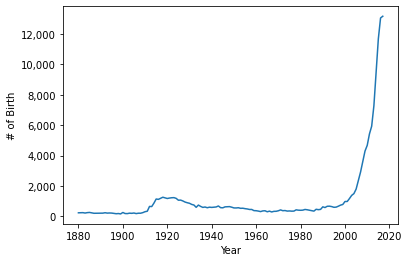

In [42]:
subset= df[df['name'] == 'Oliver']
subset = subset.groupby('year').n.sum()
plt.plot(subset.index, subset)
plt.xlabel('Year')
plt.ylabel('# of Birth')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)